# Spread Pattern and Behaviour Analysis of Covid-19


## Task 1: Data Overview and Initial Analysis

In [57]:
import pandas as pd

file_path = 'COVID-19 Daily.xlsx'  

df = pd.read_excel(file_path)
null_values = df.isnull().sum()

column_info = df.info()

descriptive_stats = df.describe()

print("Null Values:\n", null_values)
print("\nColumn Info:\n", column_info)
print("\nDescriptive Statistics:\n", descriptive_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       177 non-null    float64       
 3   Daily Recoveries  173 non-null    float64       
 4   Daily Deaths      131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB
Null Values:
 Date                 0
Daily Tests         13
Daily Cases         11
Daily Recoveries    15
Daily Deaths        57
dtype: int64

Column Info:
 None

Descriptive Statistics:
                       Date   Daily Tests  Daily Cases  Daily Recoveries  \
count                  188    175.000000   177.000000        173.000000   
mean   2020-05-29 12:00:00  14927.297143  1673.028249       1590.930636   
min    2020-02-26 00:00:00      0.000000     0

## Task 2: Visualizations for Daily Tests, Cases, Recoveries, and Deaths

Total tests performed till September 01, 2020: 2612277.0


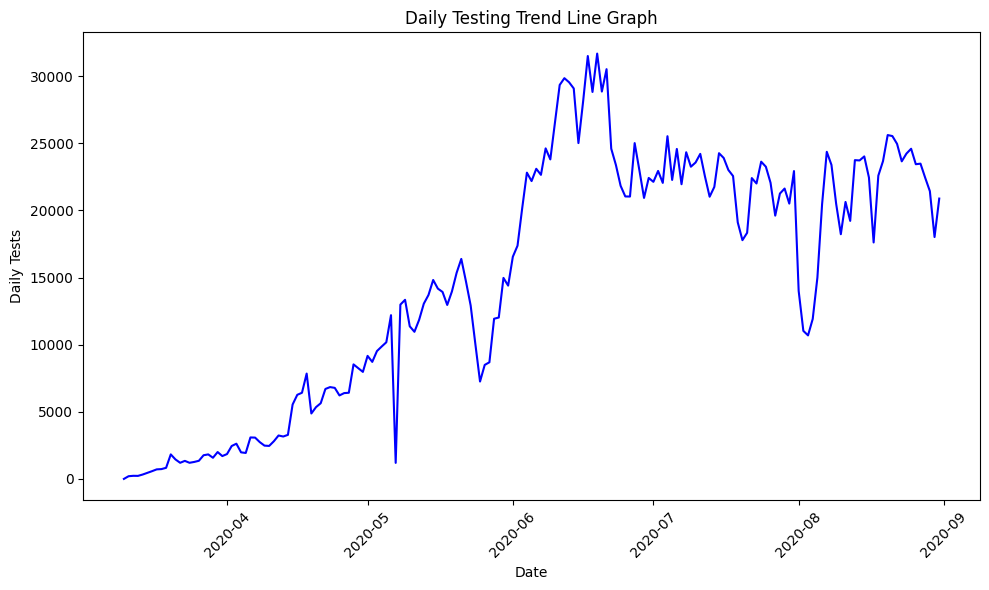

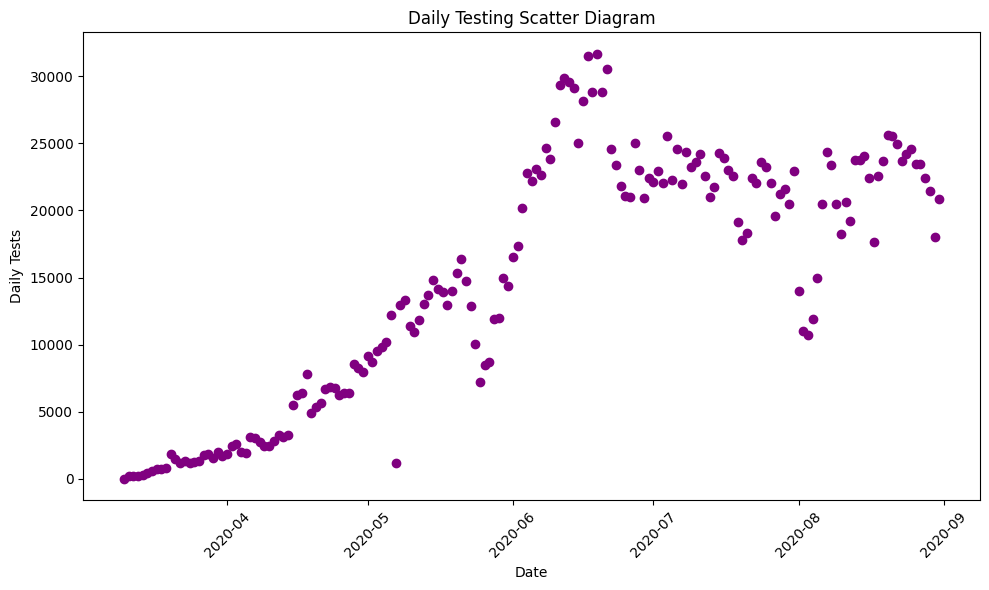

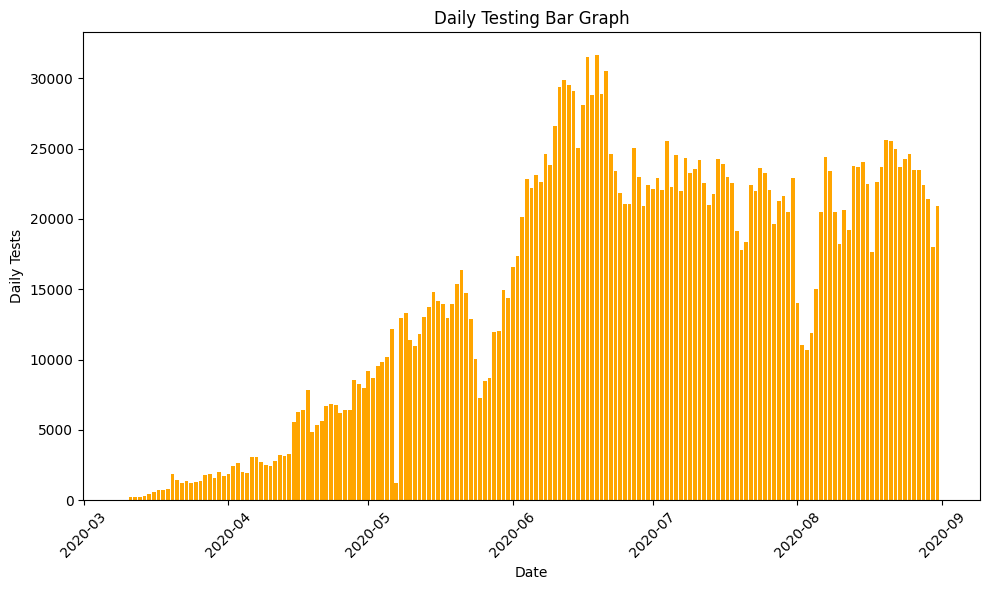

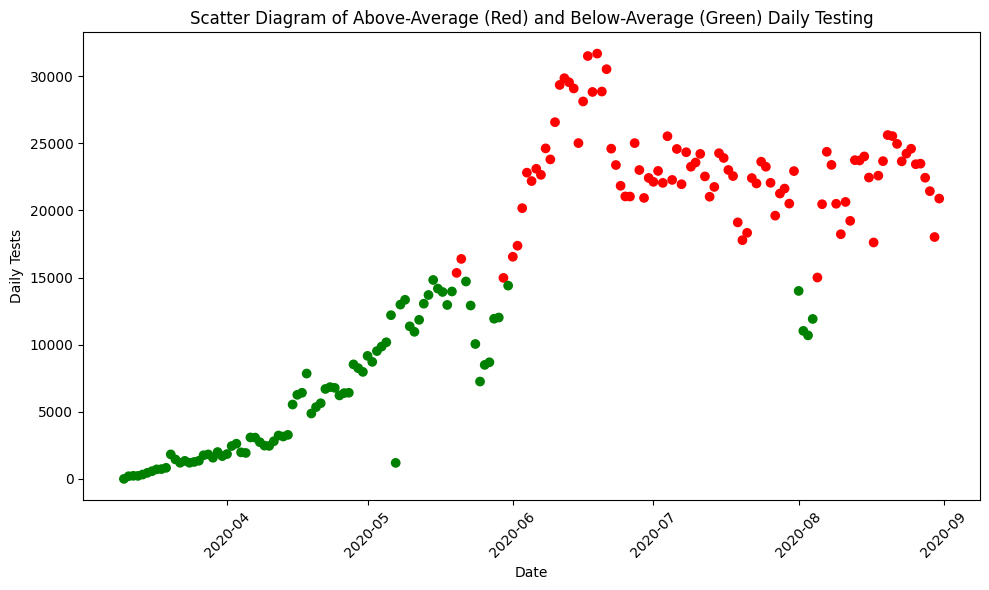

In [58]:
import matplotlib.pyplot as plt

total_tests = df['Daily Tests'].sum()
print(f"Total tests performed till September 01, 2020: {total_tests}")

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Daily Tests'], color='blue')
plt.title('Daily Testing Trend Line Graph')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Daily Tests'], color='purple')
plt.title('Daily Testing Scatter Diagram')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.bar(df['Date'], df['Daily Tests'], color='orange')
plt.title('Daily Testing Bar Graph')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_tests = df['Daily Tests'].mean()

colors = ['red' if test > average_tests else 'green' for test in df['Daily Tests']]

plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Daily Tests'], c=colors)
plt.title('Scatter Diagram of Above-Average (Red) and Below-Average (Green) Daily Testing')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Task 3: Weekly and Monthly Analysis

C:\Users\shabi\AppData\Local\Temp\ipykernel_2944\1615675448.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


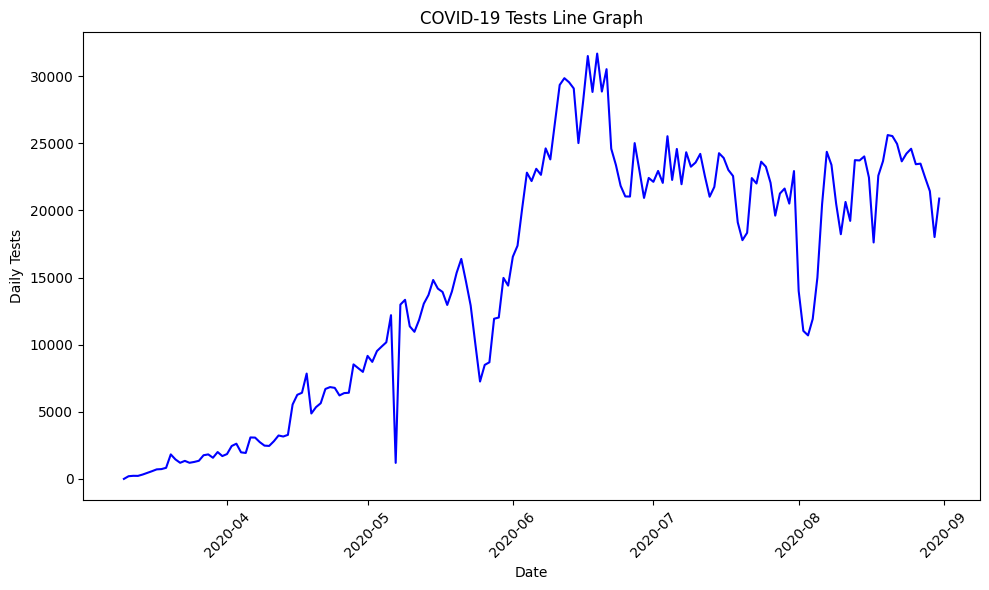

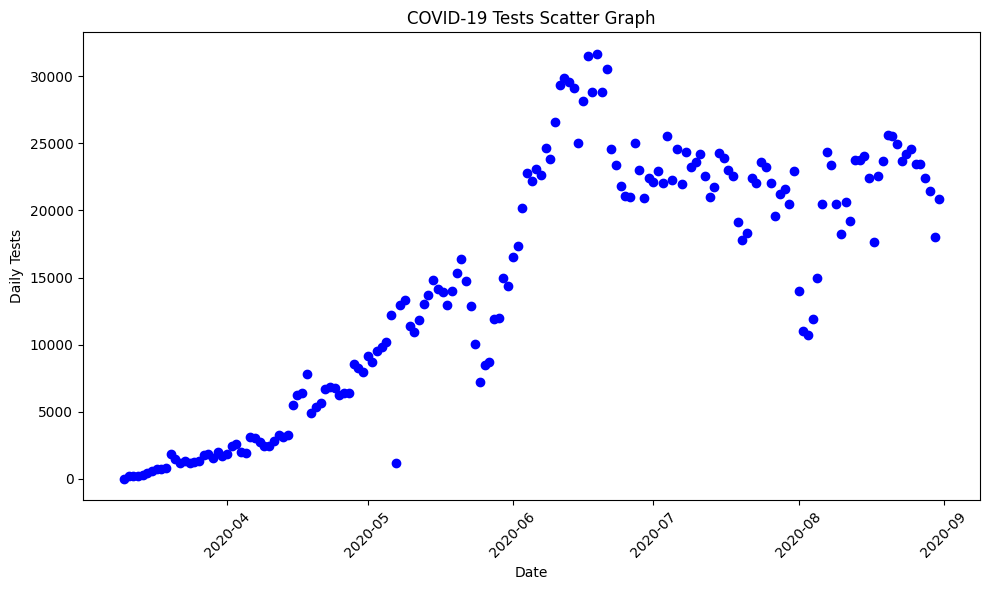

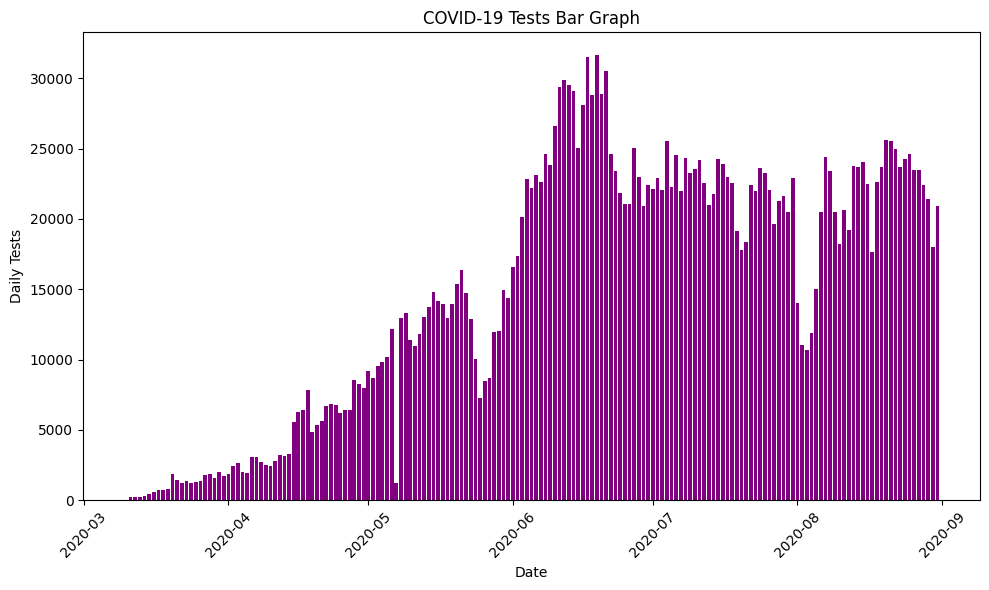

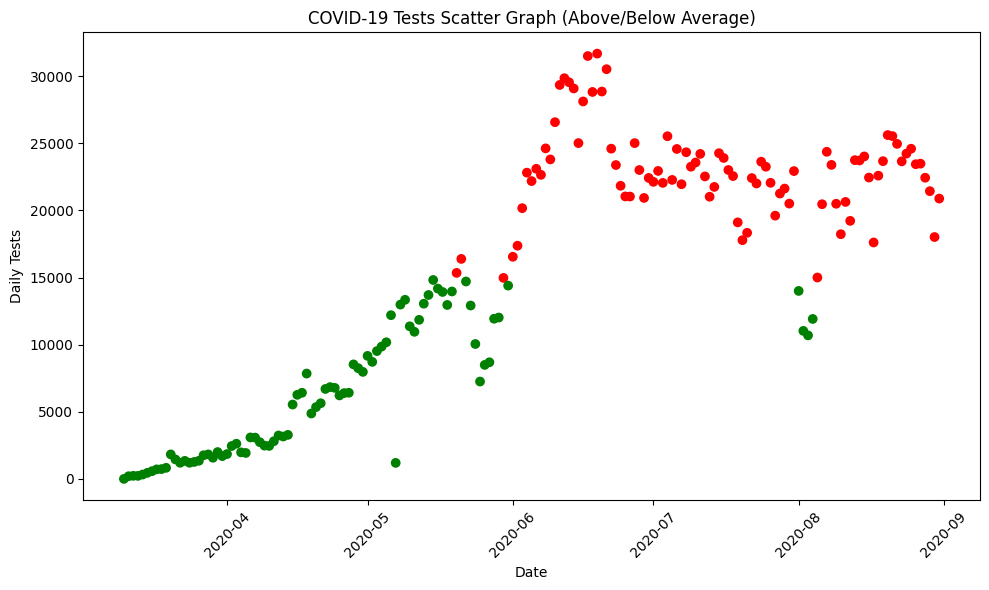

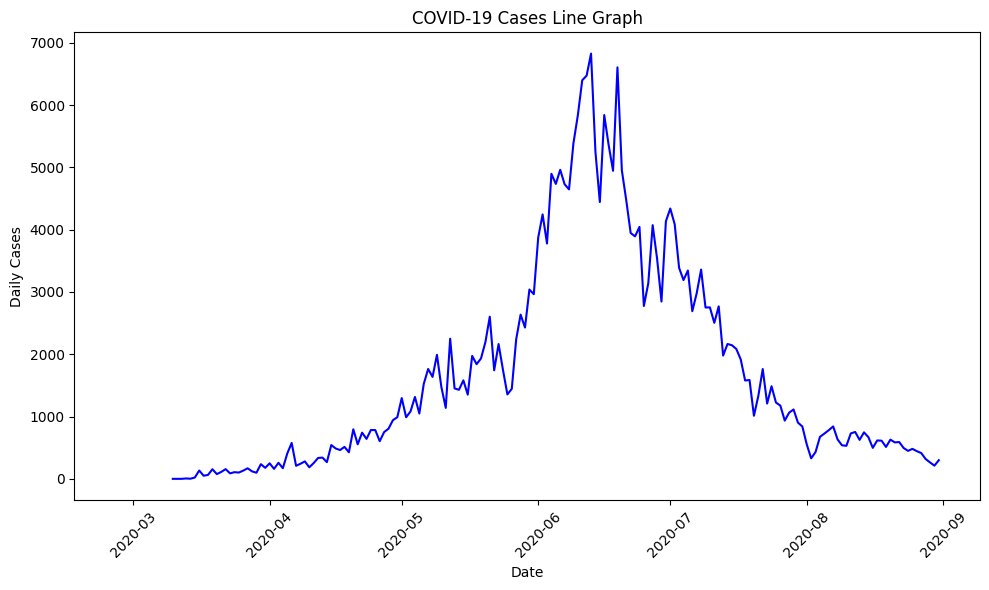

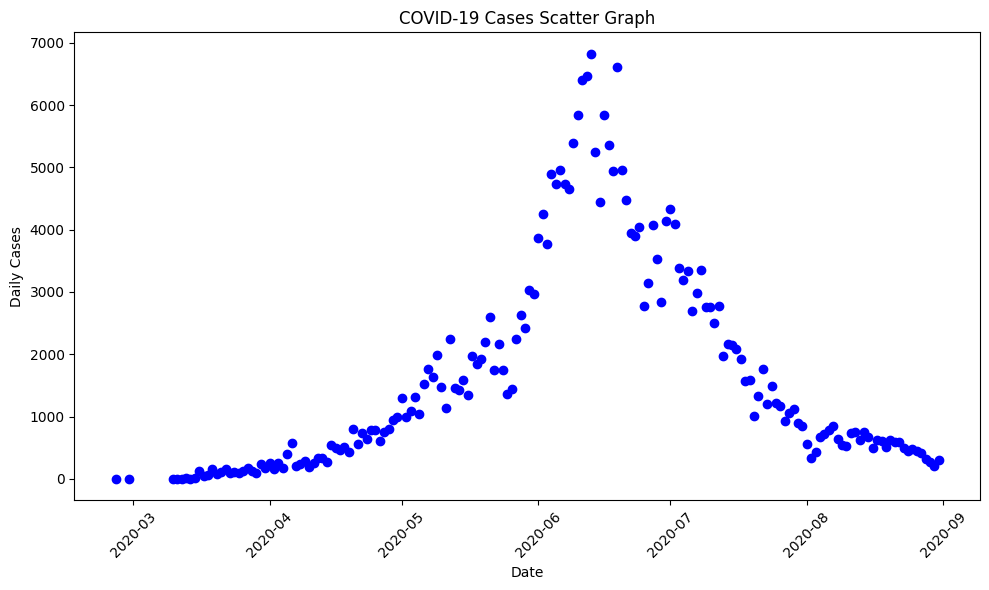

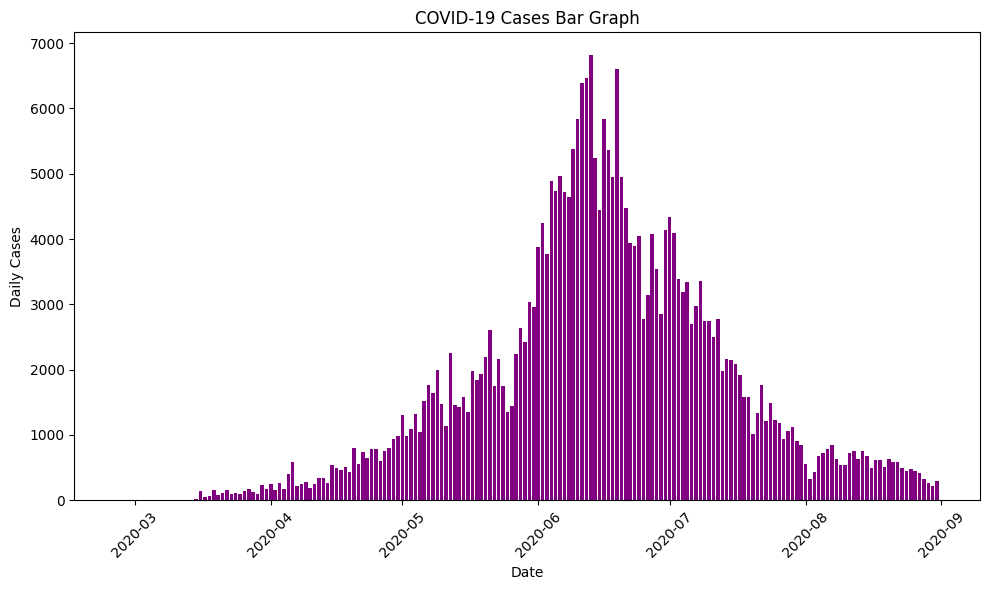

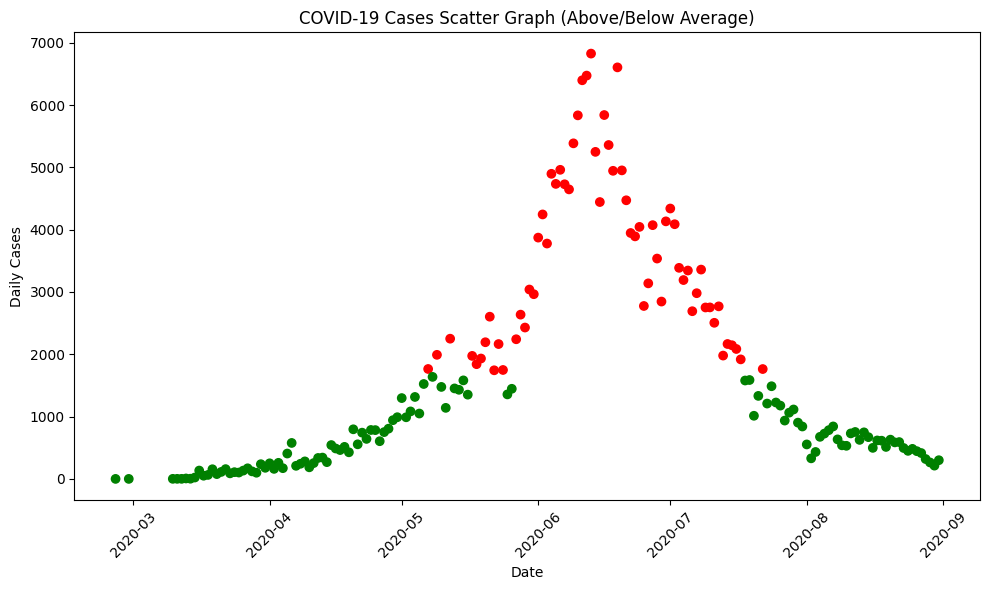

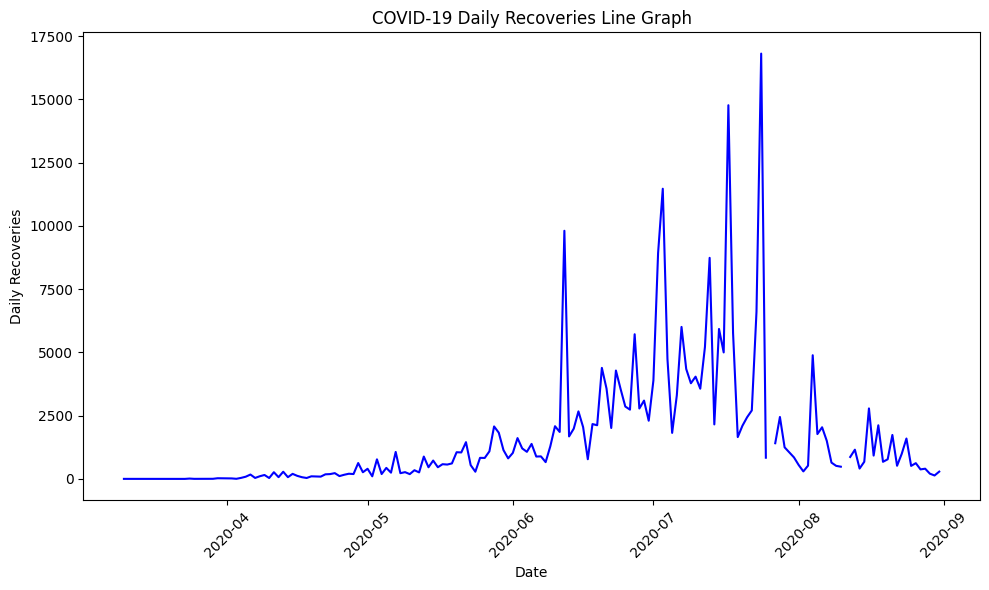

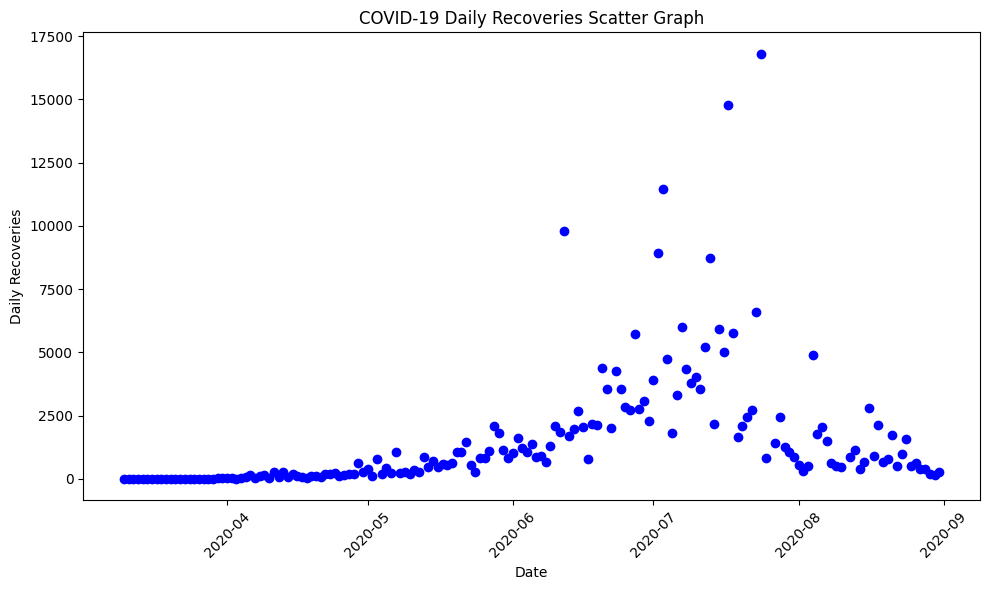

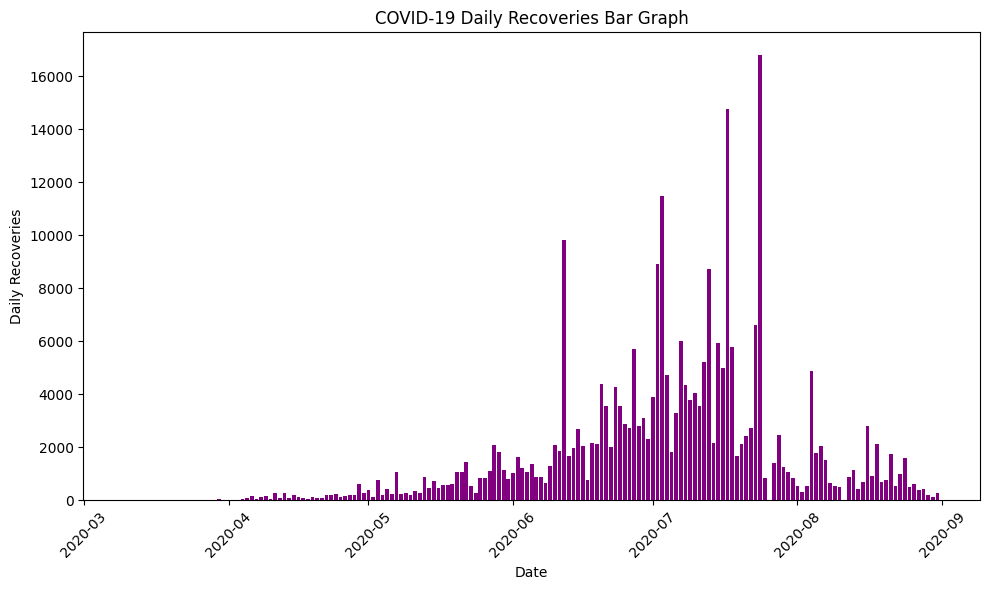

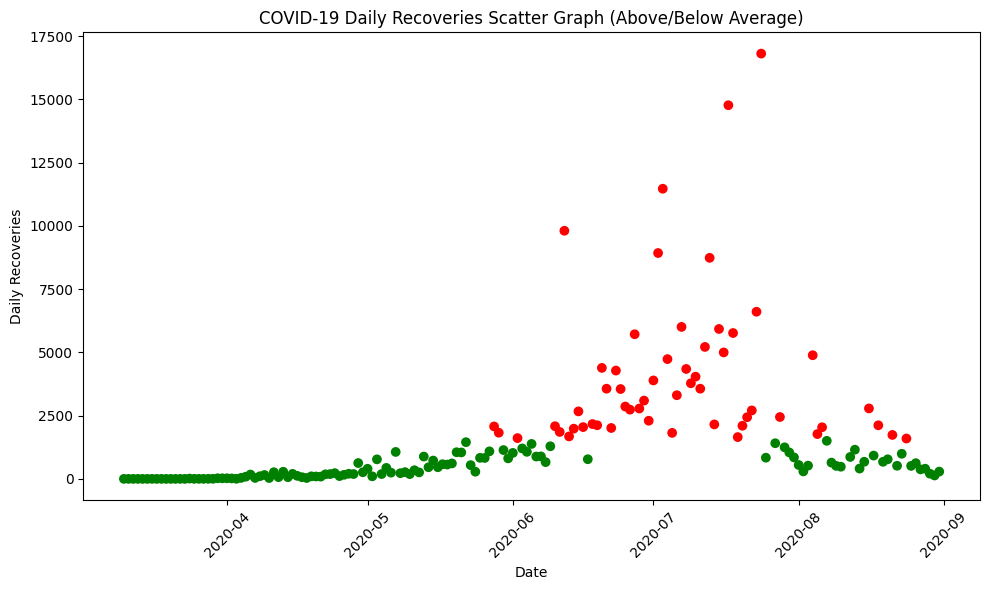

Weekly Max Tests: 204512.0, Weekly Min Tests: 0.0
Monthly Max Tests: 745419.0, Monthly Min Tests: 0.0
Weekly Max Cases: 40807.0, Weekly Min Cases: 0.0
Monthly Max Cases: 141010.0, Monthly Min Cases: 0.0
Weekly Max Recoveries: 44012.0, Weekly Min Recoveries: 0.0
Monthly Max Recoveries: 143633.0, Monthly Min Recoveries: 0.0
Weekly Max Deaths: 862.0, Weekly Min Deaths: 0.0
Monthly Max Deaths: 2852.0, Monthly Min Deaths: 0.0


In [59]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

weekly_data = df.resample('W', on='Date').sum()
monthly_data = df.resample('M', on='Date').sum()

def create_graphs(data, column_name, title):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data[column_name], color='blue')
    plt.title(f'{title} Line Graph')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.scatter(data['Date'], data[column_name], color='blue')
    plt.title(f'{title} Scatter Graph')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,6))
    plt.bar(data['Date'], data[column_name], color='purple')
    plt.title(f'{title} Bar Graph')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    average_value = data[column_name].mean()
    colors = ['red' if value > average_value else 'green' for value in data[column_name]]

    plt.figure(figsize=(10,6))
    plt.scatter(data['Date'], data[column_name], c=colors)
    plt.title(f'{title} Scatter Graph (Above/Below Average)')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

create_graphs(df, 'Daily Tests', 'COVID-19 Tests')

create_graphs(df, 'Daily Cases', 'COVID-19 Cases')

create_graphs(df, 'Daily Recoveries', 'COVID-19 Daily Recoveries')

weekly_max_tests = weekly_data['Daily Tests'].max()
weekly_min_tests = weekly_data['Daily Tests'].min()
monthly_max_tests = monthly_data['Daily Tests'].max()
monthly_min_tests = monthly_data['Daily Tests'].min()

weekly_max_cases = weekly_data['Daily Cases'].max()
weekly_min_cases = weekly_data['Daily Cases'].min()
monthly_max_cases = monthly_data['Daily Cases'].max()
monthly_min_cases = monthly_data['Daily Cases'].min()

weekly_max_recoveries = weekly_data['Daily Recoveries'].max()
weekly_min_recoveries = weekly_data['Daily Recoveries'].min()
monthly_max_recoveries = monthly_data['Daily Recoveries'].max()
monthly_min_recoveries = monthly_data['Daily Recoveries'].min()

weekly_max_deaths = weekly_data['Daily Deaths'].max()
weekly_min_deaths = weekly_data['Daily Deaths'].min()
monthly_max_deaths = monthly_data['Daily Deaths'].max()
monthly_min_deaths = monthly_data['Daily Deaths'].min()

print(f"Weekly Max Tests: {weekly_max_tests}, Weekly Min Tests: {weekly_min_tests}")
print(f"Monthly Max Tests: {monthly_max_tests}, Monthly Min Tests: {monthly_min_tests}")
print(f"Weekly Max Cases: {weekly_max_cases}, Weekly Min Cases: {weekly_min_cases}")
print(f"Monthly Max Cases: {monthly_max_cases}, Monthly Min Cases: {monthly_min_cases}")
print(f"Weekly Max Recoveries: {weekly_max_recoveries}, Weekly Min Recoveries: {weekly_min_recoveries}")
print(f"Monthly Max Recoveries: {monthly_max_recoveries}, Monthly Min Recoveries: {monthly_min_recoveries}")
print(f"Weekly Max Deaths: {weekly_max_deaths}, Weekly Min Deaths: {weekly_min_deaths}")
print(f"Monthly Max Deaths: {monthly_max_deaths}, Monthly Min Deaths: {monthly_min_deaths}")


## Task 4: Per Thousand & Per Million Calculations

In [64]:
# Assuming a population of 220 million for Pakistan
population = 220_000_000

df['Cases Per Thousand'] = (df['Daily Cases'] / population) * 1000
df['Cases Per Million'] = (df['Daily Cases'] / population) * 1_000_000

df['Tests Per Thousand'] = (df['Daily Tests'] / population) * 1000
df['Tests Per Million'] = (df['Daily Tests'] / population) * 1_000_000

df['Recoveries Per Thousand'] = (df['Daily Recoveries'] / population) * 1000
df['Recoveries Per Million'] = (df['Daily Recoveries'] / population) * 1_000_000

df['Deaths Per Thousand'] = (df['Daily Deaths'] / population) * 1000
df['Deaths Per Million'] = (df['Daily Deaths'] / population) * 1_000_000

tests_table = df[['Date', 'Daily Tests', 'Tests Per Thousand', 'Tests Per Million']]

cases_table = df[['Date', 'Daily Cases', 'Cases Per Thousand', 'Cases Per Million']]

recoveries_table = df[['Date', 'Daily Recoveries', 'Recoveries Per Thousand', 'Recoveries Per Million']]

deaths_table = df[['Date', 'Daily Deaths', 'Deaths Per Thousand', 'Deaths Per Million']]

print("Daily Tests Stats:\n", tests_table)
print("\nDaily Cases Stats:\n", cases_table)
print("\nDaily Recoveries Stats:\n", recoveries_table)
print("\nDaily Deaths Stats:\n", deaths_table)

tests_table.to_csv('daily_tests_stats.csv', index=False)
cases_table.to_csv('daily_cases_stats.csv', index=False)
recoveries_table.to_csv('daily_recoveries_stats.csv', index=False)
deaths_table.to_csv('daily_deaths_stats.csv', index=False)



Daily Tests Stats:
           Date  Daily Tests  Tests Per Thousand  Tests Per Million
0   2020-02-26          NaN                 NaN                NaN
1   2020-02-27          NaN                 NaN                NaN
2   2020-02-28          NaN                 NaN                NaN
3   2020-02-29          NaN                 NaN                NaN
4   2020-03-01          NaN                 NaN                NaN
..         ...          ...                 ...                ...
183 2020-08-27      23483.0            0.106741         106.740909
184 2020-08-28      22434.0            0.101973         101.972727
185 2020-08-29      21434.0            0.097427          97.427273
186 2020-08-30      18017.0            0.081895          81.895455
187 2020-08-31      20882.0            0.094918          94.918182

[188 rows x 4 columns]

Daily Cases Stats:
           Date  Daily Cases  Cases Per Thousand  Cases Per Million
0   2020-02-26          0.0            0.000000           0.0000

In [61]:
population = 220_000_000
monthly_data = df.resample('M', on='Date').sum()

monthly_data['Cases Per Thousand'] = (monthly_data['Daily Cases'] / population) * 1000
monthly_data['Cases Per Million'] = (monthly_data['Daily Cases'] / population) * 1_000_000

monthly_data['Positive Rate'] = (monthly_data['Daily Cases'] / monthly_data['Daily Tests']) * 100

monthly_data.index = monthly_data.index.strftime('%B %Y')

monthly_stats_table = monthly_data[['Daily Tests', 'Daily Cases', 'Cases Per Thousand', 'Cases Per Million', 'Positive Rate']]

monthly_stats_table = monthly_stats_table.rename(columns={
    'Daily Tests': 'Tests',
    'Daily Cases': 'Cases'
})

print("Monthly Stats Table:\n", monthly_stats_table)


Monthly Stats Table:
                   Tests     Cases  Cases Per Thousand  Cases Per Million  \
Date                                                                       
February 2020       0.0       0.0            0.000000           0.000000   
March 2020      22763.0    2021.0            0.009186           9.186364   
April 2020     143163.0   14778.0            0.067173          67.172727   
May 2020       365062.0   55638.0            0.252900         252.900000   
June 2020      745419.0  141010.0            0.640955         640.954545   
July 2020      690360.0   65676.0            0.298527         298.527273   
August 2020    645510.0   17003.0            0.077286          77.286364   

               Positive Rate  
Date                          
February 2020            NaN  
March 2020          8.878443  
April 2020         10.322500  
May 2020           15.240699  
June 2020          18.916878  
July 2020           9.513297  
August 2020         2.634041  


C:\Users\shabi\AppData\Local\Temp\ipykernel_2944\567210058.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


## Task 5: Train and Implement Machine Learning Model

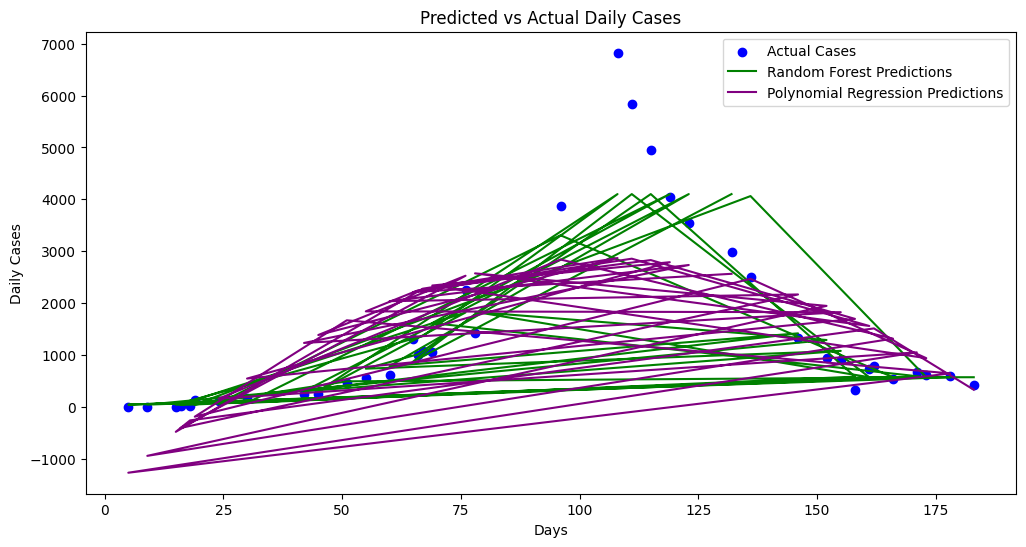

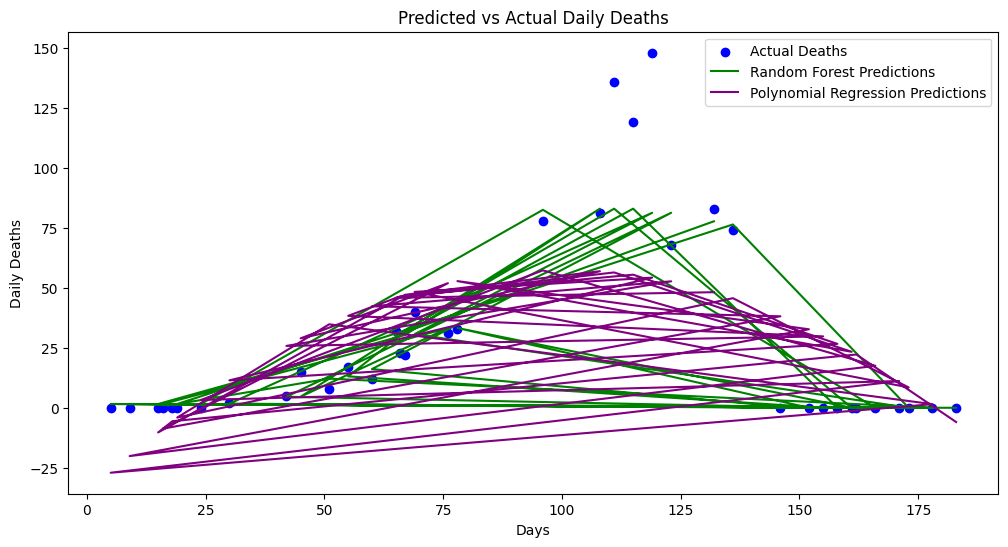

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


df.fillna(0, inplace=True)
df.head()


df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days']]
y_cases = df['Daily Cases']
y_deaths = df['Daily Deaths']

X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=42)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

random_forest_cases = RandomForestRegressor(n_estimators=300, max_depth=3, random_state=42)
random_forest_deaths = RandomForestRegressor(n_estimators=300, max_depth=3, random_state=42)

poly_reg_cases = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # Degree 2 for more complex fit
poly_reg_deaths = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

random_forest_cases.fit(X_train_cases, y_train_cases)
random_forest_deaths.fit(X_train_deaths, y_train_deaths)

poly_reg_cases.fit(X_train_cases, y_train_cases)
poly_reg_deaths.fit(X_train_deaths, y_train_deaths)

y_pred_cases_rf = random_forest_cases.predict(X_test_cases)
y_pred_cases_poly = poly_reg_cases.predict(X_test_cases)

y_pred_deaths_rf = random_forest_deaths.predict(X_test_deaths)
y_pred_deaths_poly = poly_reg_deaths.predict(X_test_deaths)

plt.figure(figsize=(12, 6))
plt.scatter(X_test_cases, y_test_cases, color='blue', label='Actual Cases')
plt.plot(X_test_cases, y_pred_cases_rf, color='green', label='Random Forest Predictions')
plt.plot(X_test_cases, y_pred_cases_poly, color='purple', label='Polynomial Regression Predictions')
plt.title('Predicted vs Actual Daily Cases')
plt.xlabel('Days')
plt.ylabel('Daily Cases')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test_deaths, y_test_deaths, color='blue', label='Actual Deaths')
plt.plot(X_test_deaths, y_pred_deaths_rf, color='green', label='Random Forest Predictions')
plt.plot(X_test_deaths, y_pred_deaths_poly, color='purple', label='Polynomial Regression Predictions')
plt.title('Predicted vs Actual Daily Deaths')
plt.xlabel('Days')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()
